In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Positional Encoding
### Why : self attention is order agnostic, cant remember order of words

Aman killed lion.  
Lion killed Amam.  
Both sentences are the same for self attention.

### Positional Encoding is done with the help of the formula : 
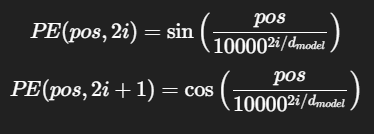  
pos : position of the word in sentence.  
d_model : dimension of embedding vector  
i : 0 -> d_model//2-1

In [1]:
import numpy as np

In [2]:
#no. of tokens
seq_len = 6

#dimension of embedding
d_model = 8

In [11]:
position = np.arange(seq_len).reshape(seq_len,1)
dimension = np.arange(d_model).reshape(1,d_model)  #for i

print("Position : \n",position)
print("Shape : ",position.shape)

print("\nDimension : ",dimension)
print("Shape : ",dimension.shape)

Position : 
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
Shape :  (6, 1)

Dimension :  [[0 1 2 3 4 5 6 7]]
Shape :  (1, 8)


## Compute the angles

In [5]:
angle_rate = 1 / np.power(10000, (2*(dimension//2))/d_model)
print(angle_rate)

[[1.    1.    0.1   0.1   0.01  0.01  0.001 0.001]]


In [18]:
angle_radians = position * angle_rate
print("Angles : \n", angle_radians)

Angles : 
 [[0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [1.e+00 1.e+00 1.e-01 1.e-01 1.e-02 1.e-02 1.e-03 1.e-03]
 [2.e+00 2.e+00 2.e-01 2.e-01 2.e-02 2.e-02 2.e-03 2.e-03]
 [3.e+00 3.e+00 3.e-01 3.e-01 3.e-02 3.e-02 3.e-03 3.e-03]
 [4.e+00 4.e+00 4.e-01 4.e-01 4.e-02 4.e-02 4.e-03 4.e-03]
 [5.e+00 5.e+00 5.e-01 5.e-01 5.e-02 5.e-02 5.e-03 5.e-03]]


## Sin for even pos and Cos for odd pos

In [10]:
pos_encoding = np.zeros((seq_len, d_model))

pos_encoding[:,0::2] = np.sin(angle_radians[:,0::2])
pos_encoding[:,1::2] = np.cos(angle_radians[:,0::2])

print(pos_encoding)
print("Shape : ", pos_encoding.shape)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  9.98334166e-02  9.95004165e-01
   9.99983333e-03  9.99950000e-01  9.99999833e-04  9.99999500e-01]
 [ 9.09297427e-01 -4.16146837e-01  1.98669331e-01  9.80066578e-01
   1.99986667e-02  9.99800007e-01  1.99999867e-03  9.99998000e-01]
 [ 1.41120008e-01 -9.89992497e-01  2.95520207e-01  9.55336489e-01
   2.99955002e-02  9.99550034e-01  2.99999550e-03  9.99995500e-01]
 [-7.56802495e-01 -6.53643621e-01  3.89418342e-01  9.21060994e-01
   3.99893342e-02  9.99200107e-01  3.99998933e-03  9.99992000e-01]
 [-9.58924275e-01  2.83662185e-01  4.79425539e-01  8.77582562e-01
   4.99791693e-02  9.98750260e-01  4.99997917e-03  9.99987500e-01]]
Shape :  (6, 8)


## Adding pos encoding to the input  
### x = x + positional encoding

In [13]:
#take random input as of now
x = np.random.rand(seq_len,d_model)
print(x)
print("Shape : ",x.shape)

[[0.09931103 0.47385784 0.30747484 0.82347971 0.58422963 0.09102233
  0.58375666 0.82751162]
 [0.57608714 0.46011282 0.04260579 0.31881343 0.35472346 0.49063481
  0.70897277 0.87136399]
 [0.33803894 0.79212085 0.31749983 0.24092255 0.16827027 0.44110931
  0.64082451 0.39426437]
 [0.99642139 0.36537318 0.37029004 0.9580667  0.79147004 0.77752293
  0.00529007 0.45310252]
 [0.97274905 0.73232197 0.52536238 0.65398554 0.37213561 0.32784409
  0.37513288 0.99225412]
 [0.9735356  0.37325821 0.07789735 0.96747653 0.06292239 0.5609356
  0.73711804 0.51199342]]
Shape :  (6, 8)


In [15]:
#final input
x = x + pos_encoding
print("Positional encoded input : \n",x)
print("Shape : ",x.shape)

Positional encoded input : 
 [[ 0.09931103  2.47385784  0.30747484  2.82347971  0.58422963  2.09102233
   0.58375666  2.82751162]
 [ 2.25902911  1.54071744  0.24227263  2.30882176  0.37472313  2.49053481
   0.71097277  2.87136299]
 [ 2.15663379 -0.04017282  0.71483849  2.20105571  0.20826761  2.44070932
   0.64482451  2.39426037]
 [ 1.27866141 -1.61461181  0.96133046  2.86873968  0.85146104  2.776623
   0.01129006  2.45309352]
 [-0.54085594 -0.57496527  1.30419907  2.49610753  0.45211427  2.3262443
   0.38313286  2.99223812]
 [-0.94431295  0.94058258  1.03674843  2.72264165  0.16288073  2.55843612
   0.747118    2.51196842]]
Shape :  (6, 8)
